In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files/'))

from CustomAstromodels import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from uncertainties import ufloat

10:50:40 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=392947;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=166352;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=984709;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=845119;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=223422;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=293299;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
def print_with_err(path):
    val = np.loadtxt(f'{path}/fit_val.txt')
    cov = np.loadtxt(f'{path}/fit_cov.txt')

    print(val)

    for i in range(len(val)):
        print(f'{val[i]} \\pm {np.sqrt(cov[i][i])}')
    

print_with_err('/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_2_2003_combined/crab_beuermann_fit_20_1000_same_E')


def val_cov_to_ufloat(path):
    val = np.loadtxt(f'{path}/fit_val.txt')
    cov = np.loadtxt(f'{path}/fit_cov.txt')

    return [ufloat(val[i], np.sqrt(cov[i][i])) for i in range(len(val))]

[ 2.29132856e-04 -1.93408339e+00 -2.63964685e+00  1.65442024e+00
  2.00454300e+02]
0.0002291328564907839 \pm 3.6406114628044066e-05
-1.9340833873294332 \pm 0.006900586464583758
-2.6396468460409848 \pm 0.06822832746978809
1.6544202419023897 \pm 0.14387208941408564
200.45430036282482 \pm 26.48299977172655


In [3]:
fit_vals_beuermann = [
5.455278890846922715e-05,
-1.729371992325146934e+00,
-2.206414502055106475e+00,
3.611972999312689225e+00,
4.645860259441865878e+02,
3.126825741408119370e+02,
]

fit_vals_band = [
    8.533732702689731525e-04,
    -1.946259908534711425e+00,
    -2.246190241592299408e+00,
]

fit_vals_beuermann_same_E = [
    2.291328564907838959e-04,
    -1.934083387329433190e+00,
    -2.639646846040984762e+00,
    1.654420241902389677e+00,
    2.004543003628248243e+02,
]

In [4]:
fit_vals_beuermann_same_E = [
    2.291328564907838959e-04,
    -1.934083387329433190e+00,
    -2.639646846040984762e+00,
    1.654420241902389677e+00,
    2.004543003628248243e+02,
]

n1 = fit_vals_beuermann_same_E[1] * fit_vals_beuermann_same_E[3]
n2 = fit_vals_beuermann_same_E[2] * fit_vals_beuermann_same_E[3]
E = fit_vals_beuermann_same_E[4]

def func(x, n1, n2, E):
    return (x/E)**n1 + (x/E)**n2 - 1

res = sp.optimize.fsolve(func, 1, args=(n1, n2, E))

res

array([241.12741063])

In [5]:
x = np.geomspace(20, 1000, 200)
band = C_Band()
y = band.evaluate(x, fit_vals_band[0], fit_vals_beuermann[1], 500, fit_vals_band[2], 100)
y_b = band.evaluate(x, fit_vals_band[0], fit_vals_band[1], 500, fit_vals_band[2], 100)



beuermann = Beuermann()
y2 = beuermann.evaluate(x, 7e-4, -1.5, -3, 1, 100, 100)
y3 = beuermann.evaluate(x, 7e-4, -1.5, -1.2, 1.2, 100, 200)

print(len(fit_vals_beuermann))

y_fit = beuermann.evaluate(x, *fit_vals_beuermann)
fit_vals_beuermann[3] = 10
y_fit_2 = beuermann.evaluate(x, *fit_vals_beuermann)


beuermann_same_E = Beuermann_same_E()
y_fit_3 = beuermann_same_E.evaluate(x, *fit_vals_beuermann_same_E)

6


In [6]:
K_with_err = ufloat(2.29e-4, 0.36e-4)


In [11]:
# print(fit_vals_band[0])
# print(band.evaluate(np.array([100]), fit_vals_band[0], fit_vals_band[1], 500, fit_vals_band[2], 100))

beuermann_2003_fit = val_cov_to_ufloat('/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_2_2003_combined/crab_beuermann_fit_20_1000_same_E')
beuermann_2017_fit = val_cov_to_ufloat('/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_2_2017_combined/crab_beuermann_fit_20_1000_same_E')

band_2003_fit = val_cov_to_ufloat('/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_2_2003_combined/crab_band_fit_20_1000')
band_2017_fit = val_cov_to_ufloat('/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_2_2017_combined/crab_band_fit_20_1000')

band_2003_free_E = val_cov_to_ufloat("/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/fit_2_2017_combined/crab_band_free_E_c_fit_20_1000")

K_100_beuermann = beuermann_eval_no_numba(np.array([100]), *beuermann_2003_fit, beuermann_2003_fit[-1]), beuermann_eval_no_numba(np.array([100]), *beuermann_2017_fit, beuermann_2017_fit[-1])
K_100_band = band_eval_no_numba(100, *band_2003_fit[:3], 500, 100), band_eval_no_numba(100, *band_2017_fit[:3], 500, 100)

K_100_band_free_E = band_eval_no_numba(100, band_2003_free_E[0], band_2003_free_E[1], band_2003_free_E[3], band_2003_free_E[2], 100)

K_100_band



(0.0006986829402239365+/-2.3886369541402436e-06,
 0.000676468005317357+/-3.109286997317205e-06)

In [12]:
K_100_band_free_E

0.0006326558920067546+/-9.148424343717384e-05

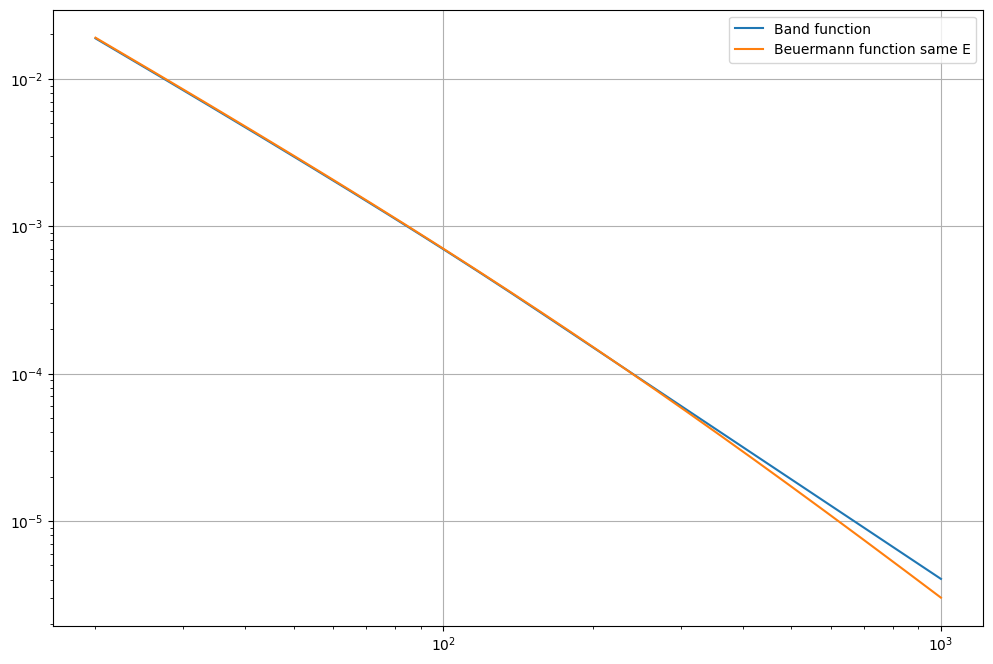

In [7]:
# comparison of the spectrum functions with real fit values

fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()

ax.set_xscale('log')
ax.set_yscale('log')
# ax.plot(x, y, label='Band function modified alpha')
ax.plot(x, y_b, label='Band function')
# # ax.plot(x, y2, label='Beuermann function n = 1')
# ax.plot(x, y_fit, label='Beuermann function from fit vals')
ax.plot(x, y_fit_3, label='Beuermann function same E')
# ax.plot(x, y_fit_2, label='Beuermann function')
ax.legend()


6


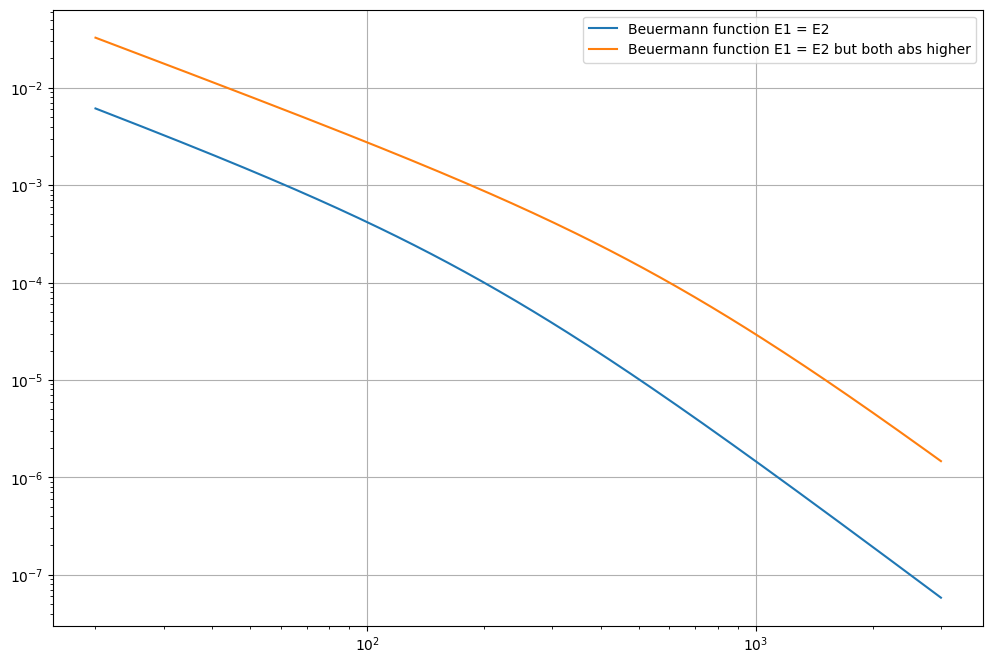

In [9]:

x = np.geomspace(20, 3000, 200)

beuermann = Beuermann()
y2 = beuermann.evaluate(x, 7e-4, -1.5, -3, 1, 300, 100)
y3 = beuermann.evaluate(x, 7e-4, -1.5, -3, 1, 100, 300)
y4 = beuermann.evaluate(x, 2e-4, -1.5, -3, 1, 200, 600)
y5 = beuermann.evaluate(x, 2e-4, -1.5, -3, 1, 200, 200)
y6 = beuermann.evaluate(x, 2e-4, -1.5, -3, 1, 600, 600)

print(len(fit_vals_beuermann))

# y_fit = beuermann.evaluate(x, *fit_vals_beuermann)
# fit_vals_beuermann[3] = 10
# y_fit_2 = beuermann.evaluate(x, *fit_vals_beuermann)

# comparison of the spectrum functions with real fit values

fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()

ax.set_xscale('log')
ax.set_yscale('log')
# ax.plot(x, y, label='Band function modified alpha')
# ax.plot(x, y_b, label='Band function')
# ax.plot(x, y2, label='Beuermann function n = 1')
# ax.plot(x, y2, label='Beuermann function E1 > E2')
# ax.plot(x, y3, label='Beuermann function E1 < E2')
# ax.plot(x, y4, label='Beuermann function E1 < E2 but both abs higher')
ax.plot(x, y5, label='Beuermann function E1 = E2')
ax.plot(x, y6, label='Beuermann function E1 = E2 but both abs higher')
# ax.plot(x, y_fit_2, label='Beuermann function')

ax.legend()